# Importing the Libraries

In [1]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

# Installing required library

In [2]:
!pip install timm
!pip install einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00


# Cloning Github repo

In [3]:
!git clone https://github.com/smile123-123/improved_yolov5

Cloning into 'improved_yolov5'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 201 (delta 49), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (201/201), 1.08 MiB | 1.45 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [4]:
%cd improved_yolov5/

/kaggle/working/improved_yolov5


# Installing YoloV5 requirements files

In [5]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 30.5 MB/s eta 0:00:00


# Preparing the traffic signs dataset for training and validation

In [6]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/kaggle/working/dataset/images/train"
val_path = "/kaggle/working/dataset/images/val"
crs_path = "/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  592
validation images are :  148


In [7]:
len(imgs)

741

In [8]:
train_image_path = "/kaggle/working/dataset/images/train"
train_label_path = "/kaggle/working/dataset/labels/train"
val_image_path = "/kaggle/working/dataset/images/val"
val_label_path = "/kaggle/working/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['00648.jpg'] ['00648.txt']


# Downloading dataset.yaml file from google cloud

In [9]:
!pip install googledrivedownloader

In [10]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1KtlDXpLCfqoklUTdrnVASNbxL_AK9qnx',
                                    dest_path='/kaggle/working/dataset/dataset.yaml')

In [11]:
with open(r'/kaggle/working/dataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /kaggle/working/dataset/images/train\n', 'val: /kaggle/working/dataset/images/val\n', '\n', 'nc: 4\n', "names: ['speed limit','yield','mandatory','other']"]


# Training model on compressed German Traffic Sign Recognition Benchmark (GTSRB) dataset

In [12]:
!wandb disabled
!wandb off
!python train.py --img 415 --batch 16 --epochs 30 --data /kaggle/working/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

W&B disabled.
W&B offline. Running your script from this directory will only write metadata locally. Use wandb disabled to completely turn off W&B.
/opt/conda/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/kaggle/working/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=Fals

# Making Predictions on Validation data

In [34]:
!python detect.py --source /kaggle/working/dataset/images/train/00791.jpg --weights runs/train/exp/weights/best.pt

/opt/conda/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/dataset/images/train/00791.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 a65c66cb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

/kaggle/working/improved_yolov5/models/experimental.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the curre

# Displaying results

In [35]:
!ls ./runs/detect/exp6

00791.jpg


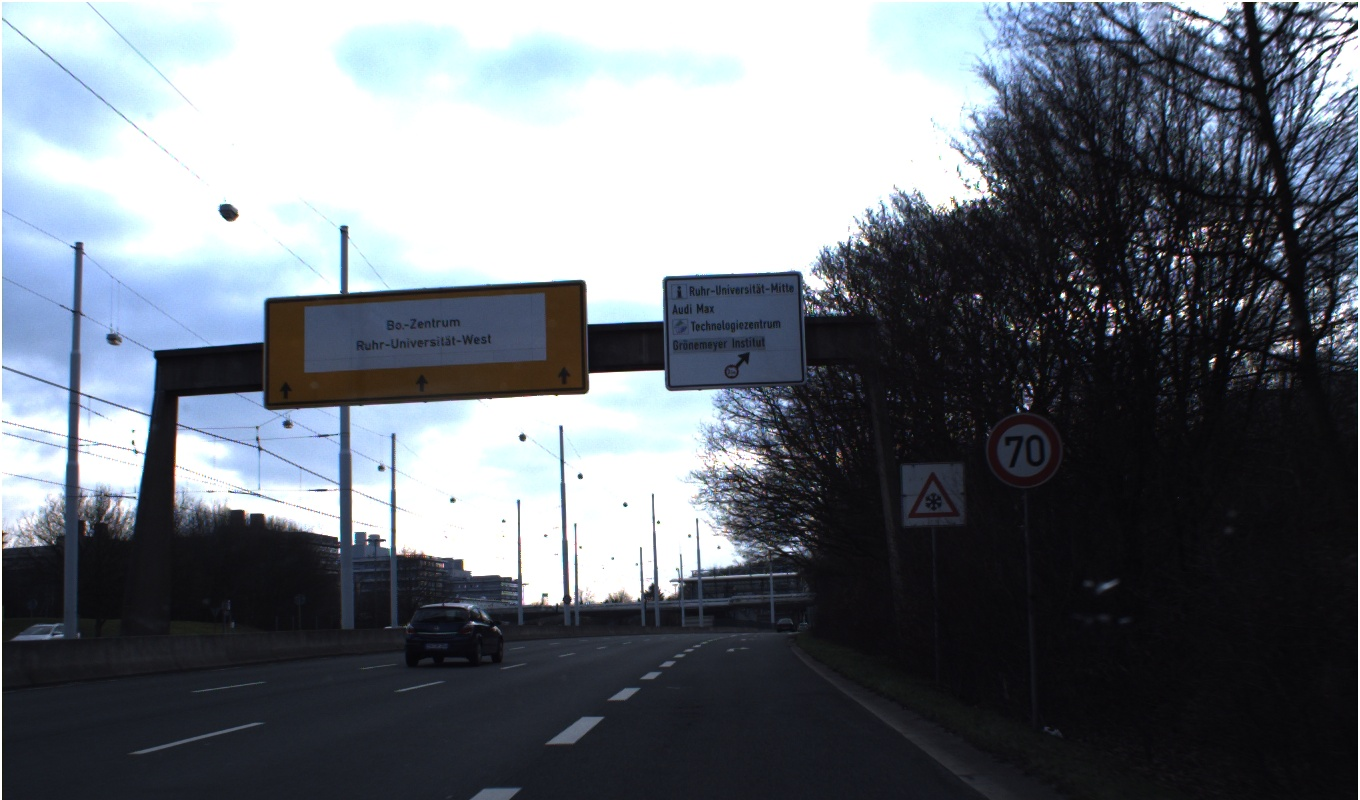

In [36]:
Image(filename='/kaggle/working/dataset/images/train/00791.jpg', width=416)

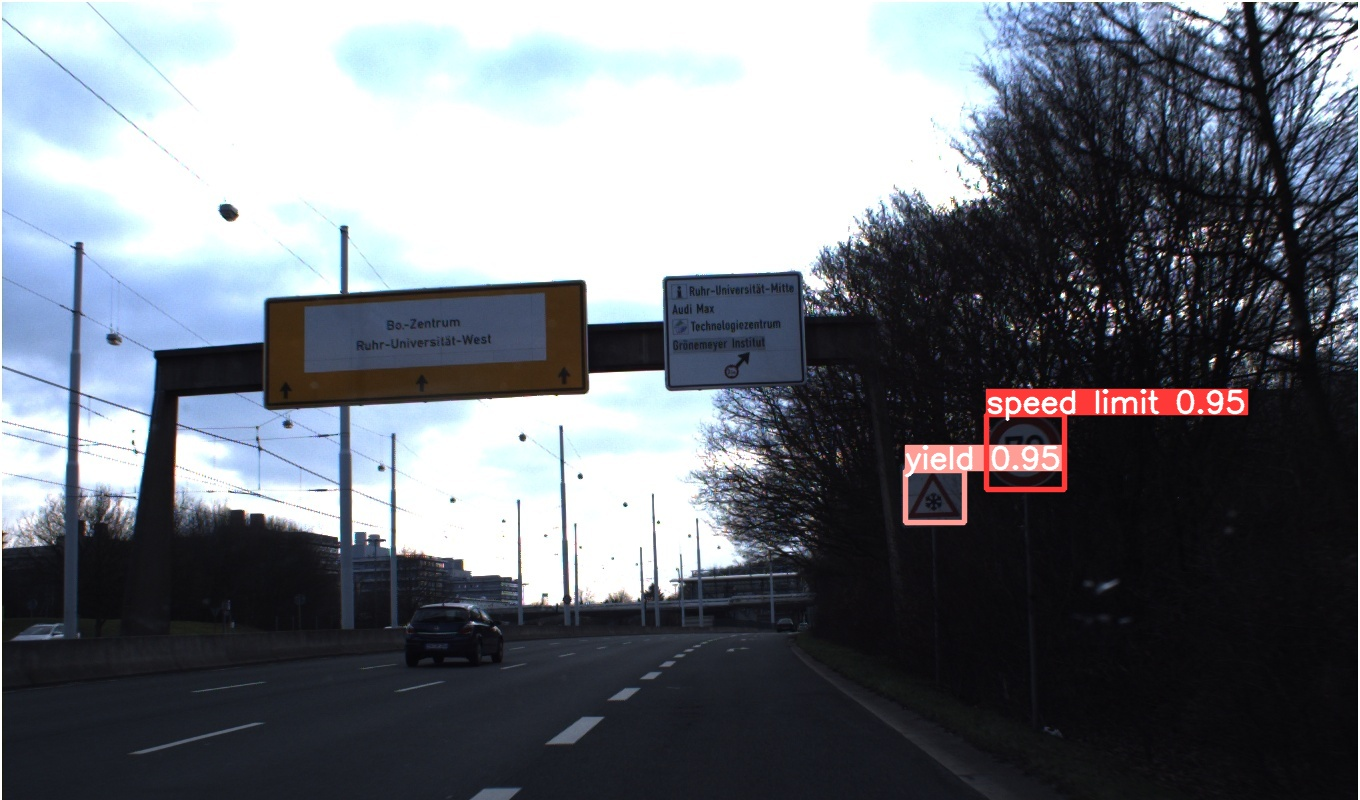

In [37]:
Image(filename='./runs/detect/exp6/00791.jpg', width=416)